# Hypothesis 5:
The population density is directly proportional the average response time taken by an emergency unit to respond to that 
incident. 
(E.g. Are the instances of the vehicle taking more time to reach the emergency spot in densely populated neighborhoods?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
my_dir = 'C:/Users/rahul/Downloads/UIUC/Sem 2 - Spring 2020/Courses/Programing Analytics/Final Project/DataSets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
NYPD_Arrests = my_dir + 'NYPD_Arrests_Data__Historic_.csv' # Loading NYPD Arrest Data file
Complaints = my_dir +  'NYPD_Complaint_Data_Historic.csv' # Loading NYPD Complaints Data file
EMS_incident = my_dir +  'EMS_Incident_Dispatch_Data.csv' # Loading EMS incident dispatch Data file
NYC_Population = my_dir +  'New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv' # Loading NYC Population Data file

In [3]:
def get_file(csv_files):
    
    """Given a filename which has a comma separated (.csv) filetype,return a pandas  
    dataframe of crime data containing the three relevant columns needed for analysis.
    
    We load the file as a pandas dataframe having no headers and load only 3 relevant column 
    needed for analysis called (CMPLNT_NUM,CMPLNT_FR_DT and BORO_NM)
    
    :param csv_files: The csv file to load
    :return: a pandas dataframe of crime data containing the three relevant columns needed for analysis
    """
    data_file = pd.read_csv(csv_files,usecols=['CAD_INCIDENT_ID','DISPATCH_RESPONSE_SECONDS_QY','INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY','BOROUGH']) # Import only necessary columns from the dataset
    return data_file


In [4]:
NYC_Complaint_Data = pd.read_csv(Complaints,usecols=['CMPLNT_NUM','CMPLNT_FR_DT','BORO_NM']) # Import only necessary columns from the dataset

In [5]:
area_count = NYC_Complaint_Data.groupby(['BORO_NM']).count()
area_count = area_count.reset_index()
area_count

,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT
0,BRONX,1484373,1484265
1,BROOKLYN,2035004,2034792
2,MANHATTAN,1645015,1644873
3,QUEENS,1351400,1351230
4,STATEN ISLAND,321394,321372


In [9]:
area_population = pd.read_csv(NYC_Population)
area_population = area_population[area_population['Year'] > 2000]
area_population

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538
200,Bronx,2010,5,BX08,West Farms-Bronx River,35011
201,Bronx,2010,5,BX09,Soundview-Castle Hill-Clason Point-Harding Park,53686
202,Bronx,2010,5,BX10,Pelham Bay-Country Club-City Island,26583
203,Bronx,2010,5,BX13,Co-Op City,43752
204,Bronx,2010,5,BX14,East Concourse-Concourse Village,62284


In [15]:
area_population_sum = area_population.groupby(['Borough'])['Population'].sum()
area_population_sum
borough_pop_df = area_population_sum.to_frame().reset_index()
borough_pop_df

,Borough,Population
0,Bronx,1385108
1,Brooklyn,2504700
2,Manhattan,1585873
3,Queens,2230722
4,Staten Island,468730


In [16]:
#https://en.wikipedia.org/wiki/Demographics_of_New_York_City
borough_pop_df['Area in sq. km'] = [109.04, 183.42, 59.13, 281.09, 151.18]
borough_pop_df['Population Density'] = borough_pop_df['Population']/borough_pop_df['Area in sq. km']
borough_pop_df['Borough'] = borough_pop_df['Borough'].str.upper() 
borough_pop_df = borough_pop_df.rename(columns={"Borough": "BORO_NM"})
borough_pop_df

,BORO_NM,Population,Area in sq. km,Population Density
0,BRONX,1385108,109.04,12702.751284
1,BROOKLYN,2504700,183.42,13655.544652
2,MANHATTAN,1585873,59.13,26820.108236
3,QUEENS,2230722,281.09,7935.970686
4,STATEN ISLAND,468730,151.18,3100.476253


In [17]:
result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], borough_pop_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,BRONX,1484373,1385108,109.04,12702.751284
1,BROOKLYN,2035004,2504700,183.42,13655.544652
2,MANHATTAN,1645015,1585873,59.13,26820.108236
3,QUEENS,1351400,2230722,281.09,7935.970686
4,STATEN ISLAND,321394,468730,151.18,3100.476253


In [18]:
result_df['crime per capita'] = result_df['CMPLNT_NUM']/result_df['Population']
result_df['Population Density'] = result_df['Population Density'].astype('int64')
result_df = result_df.sort_values(by = 'Population Density',ascending = False)
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita
2,MANHATTAN,1645015,1585873,59.13,26820,1.037293
1,BROOKLYN,2035004,2504700,183.42,13655,0.812474
0,BRONX,1484373,1385108,109.04,12702,1.071666
3,QUEENS,1351400,2230722,281.09,7935,0.605813
4,STATEN ISLAND,321394,468730,151.18,3100,0.685670


In [19]:
EMS_Data = get_file(EMS_incident)
EMS_Data

,CAD_INCIDENT_ID,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BOROUGH
0,80010001,0,NaN,NaN,BROOKLYN
1,80010002,0,NaN,NaN,BROOKLYN
2,80010003,732,1657.0,925.0,QUEENS
3,80010004,0,NaN,NaN,BROOKLYN
4,80010005,0,NaN,NaN,BROOKLYN
5,80010006,0,0.0,0.0,BRONX
6,80010007,90,90.0,0.0,MANHATTAN
7,80010008,19,463.0,444.0,QUEENS
8,80010009,31,632.0,601.0,MANHATTAN
9,80010010,52,416.0,364.0,BRONX


sum(pd.isnull(EMS_Data['DISPATCH_RESPONSE_SECONDS_QY'])) = 0
sum(pd.isnull(EMS_Data['INCIDENT_RESPONSE_SECONDS_QY'])) = 534209
sum(pd.isnull(EMS_Data['INCIDENT_TRAVEL_TM_SECONDS_QY'])) = 531500

In [84]:
EMS_count_cases = EMS_Data[['CAD_INCIDENT_ID','BOROUGH']]
EMS_count_cases = EMS_count_cases.groupby(['BOROUGH'], level=None).count()
#EMS_count_cases.columns = list(map(''.join, EMS_count_cases.columns.values))
EMS_count_cases

,CAD_INCIDENT_ID
BOROUGH,
BRONX,3790978
BROOKLYN,4706322
MANHATTAN,4065279
QUEENS,3160376
RICHMOND / STATEN ISLAND,678554
UNKNOWN,154


In [93]:
EMS_dispatch_response_avg = EMS_Data[['DISPATCH_RESPONSE_SECONDS_QY','BOROUGH']]
EMS_dispatch_response_avg.dropna()
EMS_dispatch_response_avg = EMS_dispatch_response_avg.groupby('BOROUGH',as_index=False)['DISPATCH_RESPONSE_SECONDS_QY'].mean()
EMS_dispatch_response_avg['DISPATCH_RESPONSE (Minutes)'] = EMS_dispatch_response_avg['DISPATCH_RESPONSE_SECONDS_QY']/60
EMS_dispatch_response_avg

,BOROUGH,DISPATCH_RESPONSE_SECONDS_QY,DISPATCH_RESPONSE (Minutes)
0,BRONX,113.611393,1.893523
1,BROOKLYN,69.332258,1.155538
2,MANHATTAN,118.569287,1.976155
3,QUEENS,53.089589,0.884826
4,RICHMOND / STATEN ISLAND,41.685686,0.694761
5,UNKNOWN,1545.616883,25.760281


In [116]:
EMS_incident_response_avg = EMS_Data[['INCIDENT_RESPONSE_SECONDS_QY','BOROUGH']]
EMS_incident_response_avg = EMS_incident_response_avg.dropna()
EMS_incident_response_avg = EMS_incident_response_avg.groupby('BOROUGH',as_index=False)['INCIDENT_RESPONSE_SECONDS_QY'].mean()
#EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']=EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY'].astype('int64')
EMS_incident_response_avg['AVG_INCIDENT_RESPONSE (Minutes)'] = EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']/60
EMS_incident_response_avg

,BOROUGH,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,BRONX,592.493682,9.874895
1,BROOKLYN,534.847966,8.914133
2,MANHATTAN,581.631997,9.693867
3,QUEENS,503.090094,8.384835
4,RICHMOND / STATEN ISLAND,454.991620,7.583194
5,UNKNOWN,2299.242647,38.320711


In [117]:
#Renaming the index to Staten Island 

EMS_incident_response_avg.index
EMS_incident_response_avg = EMS_incident_response_avg.rename(index={'RICHMOND / STATEN ISLAND': 'STATEN ISLAND'})  #https://note.nkmk.me/en/python-pandas-dataframe-rename/
EMS_incident_response_avg


,BOROUGH,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,BRONX,592.493682,9.874895
1,BROOKLYN,534.847966,8.914133
2,MANHATTAN,581.631997,9.693867
3,QUEENS,503.090094,8.384835
4,RICHMOND / STATEN ISLAND,454.991620,7.583194
5,UNKNOWN,2299.242647,38.320711


In [118]:
result_inc_resp_df = pd.merge(result_df, EMS_incident_response_avg, how='inner', left_on='BORO_NM', right_on='BOROUGH')


In [119]:
result_inc_resp_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita,BOROUGH,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,MANHATTAN,1645015,1585873,59.13,26820,1.037293,MANHATTAN,581.631997,9.693867
1,BROOKLYN,2035004,2504700,183.42,13655,0.812474,BROOKLYN,534.847966,8.914133
2,BRONX,1484373,1385108,109.04,12702,1.071666,BRONX,592.493682,9.874895
3,QUEENS,1351400,2230722,281.09,7935,0.605813,QUEENS,503.090094,8.384835


In [120]:
#calculating the correlation between Population Density and the incident response time
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation = result_df['Population Density'].corr(result_inc_resp_df['AVG_INCIDENT_RESPONSE (Minutes)'])
print('The correlation coefficient between Population Density and the Incident response time is : ',correlation)

The correlation coefficient between Population Density and the Incident response time is :  0.769863814244287


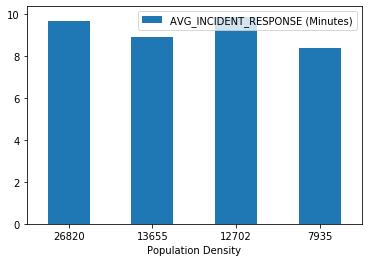

In [122]:
#https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
from matplotlib.pyplot import plot   
ax = result_inc_resp_df.plot.bar(x='Population Density', y='AVG_INCIDENT_RESPONSE (Minutes)', rot=0)
#result_inc_resp_df.sort_values('Population Density', ascending=False)[['INCIDENT_RESPONSE (Minutes)']].plot.bar(stacked=False)